In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform, truncnorm, randint

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
url = 'https://drive.google.com/file/d/1CoTEepAbFPR1c1V4xkaYKZB4l85teqQk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_raw = pd.read_csv(path, low_memory=False, index_col=0, header=None).T
print(df_raw.shape)

(32316, 235)


In [3]:
df = df_raw.copy(deep=True)

In [4]:
df.columns.values.tolist()

[nan,
 'MSRP',
 'Gas Mileage',
 'Engine',
 'EPA Class',
 'Style Name',
 'Drivetrain',
 'Passenger Capacity',
 'Passenger Doors',
 'Body Style',
 'Transmission',
 'EPA Classification',
 'Base Curb Weight (lbs)',
 'Front Hip Room (in)',
 'Front Leg Room (in)',
 'Second Shoulder Room (in)',
 'Passenger Volume (ft³)',
 'Second Head Room (in)',
 'Front Shoulder Room (in)',
 'Second Hip Room (in)',
 'Front Head Room (in)',
 'Second Leg Room (in)',
 'Wheelbase (in)',
 'Min Ground Clearance (in)',
 'Track Width, Front (in)',
 'Width, Max w/o mirrors (in)',
 'Track Width, Rear (in)',
 'Height, Overall (in)',
 'Cargo Volume to Seat 1 (ft³)',
 'Cargo Volume to Seat 2 (ft³)',
 'Cargo Volume to Seat 3 (ft³)',
 'Fuel Tank Capacity, Approx (gal)',
 'Fuel Economy Est-Combined (MPG)',
 'EPA Fuel Economy Est - City (MPG)',
 'EPA Fuel Economy Est - Hwy (MPG)',
 'Engine Order Code',
 'SAE Net Torque @ RPM',
 'Fuel System',
 'Engine Type',
 'SAE Net Horsepower @ RPM',
 'Displacement',
 'First Gear Ratio (:

In [5]:
print(df.shape)
df["MSRP"] = df['MSRP'].replace('[\$,]', '', regex=True).astype(float)
print(df["MSRP"].isnull().sum())
df.dropna(subset=["MSRP"], inplace=True)
df = df.reset_index()
#display(df)
df["MSRP"] = df["MSRP"].astype(int)
print(df["MSRP"].isnull().sum())
df = df.drop("index", axis=1)
print(df.shape)

(32316, 235)
54
0
(32262, 235)


In [6]:
df = df.rename(columns={np.nan: 'model'})
df.columns
df

,model,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,...,Fourth Hip Room (in),Fourth Leg Room (in),Fourth Shoulder Room (in),Fourth Head Room (in),Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note
0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019 Acura RDX Specs: FWD w/Advance Pkg,45500,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600,22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019 Acura RDX Specs: FWD,37400,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019 Acura RDX Specs: AWD w/Technology Pkg,42600,21 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700,NaN,"Intercooled Turbo Regular Unleaded I-4, 2.0 L",Mid-Size Station Wagon,T5 AWD Platinum,All Wheel Drive,5,4,4dr Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32258,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32259,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,4dr Wgn T5 Platinum AWD,All Wheel Drive,5,4,4dr Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32260,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,2015.5 4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
i = 0
df["Year"] = 0
df["Marque"] = ""
df["Modele"] = ""
df["Specs"] = ""
size = df.shape[0]
while i < size:
    strings = df.loc[i, "model"].split(" ")
    df.loc[i, "Year"] = int(strings[0])
    df.loc[i, "Marque"] = strings[1]
    df.loc[i, "Modele"] = strings[2]
    z = 3
    str_size = len(strings)
    while z < str_size and strings[z].find("Specs") == -1:
        df.loc[i, "Modele"] = df.loc[i, "Modele"] + strings[z]
        z += 1
    if z < str_size:
        z += 1
        while z < str_size:
            df.loc[i, "Specs"] = df.loc[i, "Specs"] + strings[z]
            z += 1
    if i == 1:
        print("in process")
    i += 1
print("done")
df = df.drop("model", axis = 1)
print(df.shape)
df[["Year", "Marque", "Modele", "Specs"]].head()

in process
done
(32262, 238)


,Year,Marque,Modele,Specs
0,2019,Acura,RDX,FWDw/TechnologyPkg
1,2019,Acura,RDX,FWDw/AdvancePkg
2,2019,Acura,RDX,FWDw/A-SpecPkg
3,2019,Acura,RDX,FWD
4,2019,Acura,RDX,AWDw/TechnologyPkg


In [8]:
df

,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,...,Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note,Year,Marque,Modele,Specs
0,40600,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,FWDw/TechnologyPkg
1,45500,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,FWDw/AdvancePkg
2,43600,22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,FWDw/A-SpecPkg
3,37400,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,FWD
4,42600,21 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,AWDw/TechnologyPkg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,45700,NaN,"Intercooled Turbo Regular Unleaded I-4, 2.0 L",Mid-Size Station Wagon,T5 AWD Platinum,All Wheel Drive,5,4,4dr Car,Transmission: 8-Speed Geartronic Automatic -in...,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,Volvo,V60CrossCountry,T5AWDPlatinum
32258,41200,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,Transmission: 6-Speed Geartronic Automatic -in...,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,Volvo,V60CrossCountry,4-DoorWagonT5AWD
32259,44850,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,4dr Wgn T5 Platinum AWD,All Wheel Drive,5,4,4dr Car,Transmission: 6-Speed Geartronic Automatic -in...,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,Volvo,V60CrossCountry,4-DoorWagonT5PlatinumAWD
32260,41000,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,2015.5 4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,Transmission: 6-Speed Geartronic Automatic -in...,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,Volvo,V60CrossCountry,2015.54-DoorWagonT5AWD


IN DF2 WE DROP COLUMN WITH TOO MUCH NULL VALUES

In [9]:
#null_values = df.iloc[:, 0:50].isnull().sum() / 32316 * 100

def plot_null_values(df, figsize=(10, 10), fontsize=20, x_pas=10, grid=False):
    null_values = np.array(df.isnull().sum() / df.shape[0] * 100)
    plt.figure(figsize=figsize)
    plt.plot(null_values, color="red")
    plt.xticks(np.array(range(0, df.shape[1], x_pas)))
    plt.xlabel("column index", fontsize=fontsize)
    plt.ylabel("null %", fontsize=fontsize)
    plt.title('Null Values', fontsize=fontsize)
    if grid:
        plt.grid()
    plt.show()

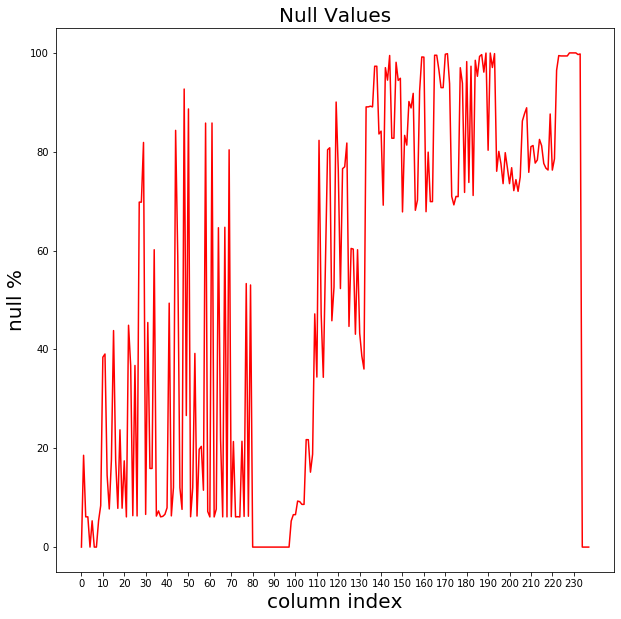

In [10]:
plot_null_values(df)

In [11]:
#len([x for x in null_values if x < 22])

def drop_null_values_percent(df, percent, inplace=False):
    null_values = np.array(df.isnull().sum() / df.shape[0] * 100)
    indexs = []
    i = 0
    size = len(null_values)
    while i < size:
        if null_values[i] <= percent:
            indexs.append(i)
        i += 1
    if inplace:
        df = df.iloc[:, indexs]
    df_cp = df.copy(deep=True)
    return(df_cp.iloc[:, indexs])

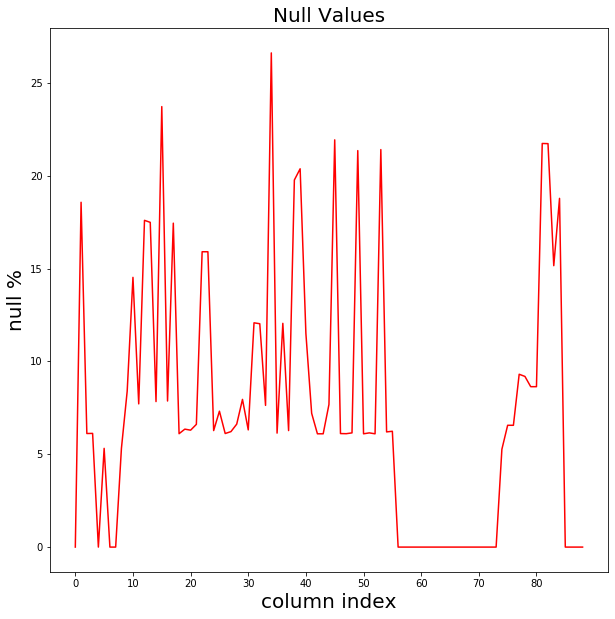

['MSRP',
 'Gas Mileage',
 'Engine',
 'EPA Class',
 'Style Name',
 'Drivetrain',
 'Passenger Capacity',
 'Passenger Doors',
 'Body Style',
 'Transmission',
 'Front Hip Room (in)',
 'Front Leg Room (in)',
 'Second Shoulder Room (in)',
 'Second Head Room (in)',
 'Front Shoulder Room (in)',
 'Second Hip Room (in)',
 'Front Head Room (in)',
 'Second Leg Room (in)',
 'Wheelbase (in)',
 'Width, Max w/o mirrors (in)',
 'Height, Overall (in)',
 'Fuel Tank Capacity, Approx (gal)',
 'EPA Fuel Economy Est - City (MPG)',
 'EPA Fuel Economy Est - Hwy (MPG)',
 'SAE Net Torque @ RPM',
 'Fuel System',
 'Engine Type',
 'SAE Net Horsepower @ RPM',
 'Displacement',
 'First Gear Ratio (:1)',
 'Trans Description Cont.',
 'Fourth Gear Ratio (:1)',
 'Second Gear Ratio (:1)',
 'Reverse Ratio (:1)',
 'Fifth Gear Ratio (:1)',
 'Trans Type',
 'Third Gear Ratio (:1)',
 'Brake Type',
 'Rear Brake Rotor Diam x Thickness (in)',
 'Disc - Rear (Yes or   )',
 'Brake ABS System',
 'Front Brake Rotor Diam x Thickness (in)

In [12]:
df2 = drop_null_values_percent(df, 30)
plot_null_values(df2)
df2.columns.values.tolist()

# Premier test de machine learning

Choix en fonction des correlations

In [13]:
df3 = df2.copy(deep=True)
tab = df2.loc[:, df2.dtypes == object].columns.values.tolist()
for col in tab:
    df3[col] = df3[col].astype('category').cat.codes
tab_names = np.append("MSRP", np.array(df3.corr()["MSRP"].sort_values(ascending=False)[1:30].index))
df3 = df2[tab_names]

In [14]:
tab_names

array(['MSRP', 'Rear Wheel Size (in)', 'SAE Net Horsepower @ RPM',
       'Front Wheel Size (in)', 'SAE Net Torque @ RPM',
       'Front Brake Rotor Diam x Thickness (in)', 'Basic Miles/km',
       'Parking Aid', 'Rear Tire Size',
       'Rear Brake Rotor Diam x Thickness (in)', 'Displacement',
       'Trans Type', 'Engine Type', 'Engine', 'Transmission',
       'Traction Control', 'Fifth Gear Ratio (:1)', 'Stability Control',
       'Fourth Gear Ratio (:1)', 'Width, Max w/o mirrors (in)',
       'Front Tire Size', 'Disc - Rear (Yes or   )', 'Year',
       'Third Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Air Bag-Side Body-Front', 'Fuel Tank Capacity, Approx (gal)',
       'Back-Up Camera', 'Drivetrain Miles/km', 'Steering Type'],
      dtype=object)

In [15]:
tab = df3.loc[:, df3.dtypes == object].columns.values.tolist()
for col in tab:
    df3[col] = df3[col].astype('category').cat.codes
df3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MSRP,Rear Wheel Size (in),SAE Net Horsepower @ RPM,Front Wheel Size (in),SAE Net Torque @ RPM,Front Brake Rotor Diam x Thickness (in),Basic Miles/km,Parking Aid,Rear Tire Size,Rear Brake Rotor Diam x Thickness (in),...,Front Tire Size,Disc - Rear (Yes or ),Year,Third Gear Ratio (:1),Second Gear Ratio (:1),Air Bag-Side Body-Front,"Fuel Tank Capacity, Approx (gal)",Back-Up Camera,Drivetrain Miles/km,Steering Type
0,40600,148,729,132,760,274,7,1,474,235,...,477,0,2019,216,285,1,84,1,10,63
1,45500,148,729,132,760,274,7,1,474,235,...,477,0,2019,216,285,1,84,1,10,63
2,43600,181,729,159,760,274,7,1,644,235,...,650,0,2019,216,285,1,84,1,10,63
3,37400,148,729,132,760,274,7,0,474,235,...,477,0,2019,216,285,1,84,1,10,63
4,42600,148,729,132,760,274,7,1,474,235,...,477,0,2019,216,285,1,84,1,10,63


In [16]:
# Drop col with too much corr between them

"""
tab_col = df3.columns.values.tolist()
col_to_drop = []
for col in tab_col:
    if col == "MSRP":
        continue
    next_continue = False
    for z in col_to_drop:
        if z == col:
            next_continue = True
    if next_continue:
        continue
    print("\ncol :", col)
    tab = df3.corr()[col].sort_values(ascending=False)[1::]
    tab_index = tab.index
    i = 0
    size = len(tab)
    while i < size:
        if tab[i] > 0.9:
            col_to_drop.append(tab_index[i])
            print(tab_index[i], ":", tab[i])
        i += 1
print("\n", "*"*30, "\n")
for col in col_to_drop:
    print(col)
df3 = df3.drop(col_to_drop, axis=1)
df3.columns.values.tolist()
"""

'\ntab_col = df3.columns.values.tolist()\ncol_to_drop = []\nfor col in tab_col:\n    if col == "MSRP":\n        continue\n    next_continue = False\n    for z in col_to_drop:\n        if z == col:\n            next_continue = True\n    if next_continue:\n        continue\n    print("\ncol :", col)\n    tab = df3.corr()[col].sort_values(ascending=False)[1::]\n    tab_index = tab.index\n    i = 0\n    size = len(tab)\n    while i < size:\n        if tab[i] > 0.9:\n            col_to_drop.append(tab_index[i])\n            print(tab_index[i], ":", tab[i])\n        i += 1\nprint("\n", "*"*30, "\n")\nfor col in col_to_drop:\n    print(col)\ndf3 = df3.drop(col_to_drop, axis=1)\ndf3.columns.values.tolist()\n'

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   MSRP                                     32262 non-null  int32
 1   Rear Wheel Size (in)                     32262 non-null  int16
 2   SAE Net Horsepower @ RPM                 32262 non-null  int16
 3   Front Wheel Size (in)                    32262 non-null  int16
 4   SAE Net Torque @ RPM                     32262 non-null  int16
 5   Front Brake Rotor Diam x Thickness (in)  32262 non-null  int16
 6   Basic Miles/km                           32262 non-null  int8 
 7   Parking Aid                              32262 non-null  int8 
 8   Rear Tire Size                           32262 non-null  int16
 9   Rear Brake Rotor Diam x Thickness (in)   32262 non-null  int16
 10  Displacement                             32262 non-null  int16
 11  Tr

In [18]:
tab_col = np.array(df3.corr()["MSRP"].sort_values(ascending=False)[1::].index)

In [19]:
print(len(tab_col))
col_to_drop = []
for col in tab_col:
    nb_uni = len(df3[col].unique())
    print("col :", col, "=", nb_uni)    
    if nb_uni > 500:
        col_to_drop.append(col)
print("\n", "*"*30, "\n")
for col in col_to_drop:
    print(col)

29
col : Rear Wheel Size (in) = 235
col : SAE Net Horsepower @ RPM = 1421
col : Front Wheel Size (in) = 201
col : SAE Net Torque @ RPM = 1477
col : Front Brake Rotor Diam x Thickness (in) = 576
col : Basic Miles/km = 12
col : Parking Aid = 2
col : Rear Tire Size = 940
col : Rear Brake Rotor Diam x Thickness (in) = 508
col : Displacement = 412
col : Trans Type = 18
col : Engine Type = 168
col : Engine = 451
col : Transmission = 1980
col : Traction Control = 2
col : Fifth Gear Ratio (:1) = 189
col : Stability Control = 2
col : Fourth Gear Ratio (:1) = 223
col : Width, Max w/o mirrors (in) = 290
col : Front Tire Size = 865
col : Disc - Rear (Yes or   ) = 2
col : Year = 29
col : Third Gear Ratio (:1) = 233
col : Second Gear Ratio (:1) = 298
col : Air Bag-Side Body-Front = 2
col : Fuel Tank Capacity, Approx (gal) = 244
col : Back-Up Camera = 2
col : Drivetrain Miles/km = 15
col : Steering Type = 101

 ****************************** 

SAE Net Horsepower @ RPM
SAE Net Torque @ RPM
Front Brake

In [20]:
df3 = df3.drop(col_to_drop, axis=1)

In [21]:
df3.columns.values.tolist()

['MSRP',
 'Rear Wheel Size (in)',
 'Front Wheel Size (in)',
 'Basic Miles/km',
 'Parking Aid',
 'Displacement',
 'Trans Type',
 'Engine Type',
 'Engine',
 'Traction Control',
 'Fifth Gear Ratio (:1)',
 'Stability Control',
 'Fourth Gear Ratio (:1)',
 'Width, Max w/o mirrors (in)',
 'Disc - Rear (Yes or   )',
 'Year',
 'Third Gear Ratio (:1)',
 'Second Gear Ratio (:1)',
 'Air Bag-Side Body-Front',
 'Fuel Tank Capacity, Approx (gal)',
 'Back-Up Camera',
 'Drivetrain Miles/km',
 'Steering Type']

# TENTATIVE ALGO NO 2

In [22]:
df4 = drop_null_values_percent(df, 50)
tab = df4.loc[:, df4.dtypes == object].columns.values.tolist()
for col in tab:
    df4[col] = df4[col].astype('category').cat.codes

#tab_names = np.append("MSRP", np.array(df3.corr()["MSRP"].sort_values(ascending=False)[1::].index))
#df4 = df[tab_names]

#df4 = df2[["MSRP", 'Rear Wheel Size (in)', "Basic Miles/km", "Parking Aid"]]

#tab = df4.loc[:, df4.dtypes == object].columns.values.tolist()
#for col in tab:
#    df4[col] = df4[col].astype('category').cat.codes

"""
column_names_to_normalize = ["MSRP", "Year", "Modele", "Engine Type", "Rear Wheel Size (in)"]
x = df4[column_names_to_normalize].values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df4.index)
df4[column_names_to_normalize] = df_temp
"""

print(df4.shape)
df4.corr()["MSRP"].sort_values(ascending=False)[1:30]

(32262, 108)


0
Rear Wheel Size (in)                       0.528854
SAE Net Horsepower @ RPM                   0.518352
Front Wheel Size (in)                      0.515126
SAE Net Torque @ RPM                       0.491576
Front Brake Rotor Diam x Thickness (in)    0.411771
Basic Miles/km                             0.393594
Parking Aid                                0.386824
Rear Tire Size                             0.364535
Rear Brake Rotor Diam x Thickness (in)     0.341635
Displacement                               0.332469
Sixth Gear Ratio (:1)                      0.328900
Base Curb Weight (lbs)                     0.315498
Trans Type                                 0.313880
Engine Type                                0.304170
Engine                                     0.295356
Track Width, Rear (in)                     0.292767
Track Width, Front (in)                    0.280874
Transmission                               0.275327
Traction Control                           0.274749
Fifth Gear

In [23]:
df["Front Wheel Size (in)"].unique()

array(['19 X 8', '20 X 8', '18 X 7.5', '18 x 7.5', '18 X 8', '20 X 8.5',
       '18 x 8.0', '19 x 8.5', '18 x 8', '17 x 6.5', '17 X 7.5', '17 X 7',
       '16 X 6.5', '16 x 6.5', '17 x 7.0', '19 X 8.5', '17" x 7"',
       '16" x 7"', nan, '18 X 7', '20 X 9', '18 x 8.5', '19 x 9',
       '20 x 8.5', '17 X 8', '17 x 8.0', '17 x - TBD -', '18 x - TBD -',
       '17 x 8', '17 x 7.5', '16 x 7.5', '16 x 7.0', '16 x 8.0', '16 x 7',
       '16 x 8', '15 x 6', '15 x 7', '19 x - TBD -', '21 X 9', '19 x 8.0',
       '19 X 9', '19 x 9.0', '18 X 8.5', '20 x 9.0', '20 x 9', '- TBD -',
       '15 x 7.0', '15" x 7"', '18 X 9', '18 x 9.0', '18 x 9', '17 x 8.5',
       '20 x - TBD -', '21 X 10', '20 X 10', '22 X 10', '20 X 9.5',
       '21 X 9.5', '20 X - TBD -', '20 x 9.5', 'P275/40R19', '18 x 9.5',
       '15 x 6.5', '20 x 10.0', '20 x 10', '20.0 x 9.5', '19 X 7.5',
       '20 X 7.5', '19 X 9.5', '19 X 5', '20 X 5.5', '21 X 8.5',
       '21 x 8.5', '21 x - TBD -', '21 x 9.0', '19 x 9.5',
       '18" x

In [24]:
X = df4.iloc[:, 1::]
y = df4.iloc[:, 0]
display(X)
display(y)
X = np.array(X)
y = np.array(y)

,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,EPA Classification,...,"Length, Overall (in)",Turning Diameter - Wall to Wall (ft),Shock Absorber Diameter - Front (mm),Shock Absorber Diameter - Rear (mm),Stabilizer Bar Diameter - Front (in),Total Cooling System Capacity (qts),Year,Marque,Modele,Specs
0,126,361,67,9253,15,7,3,22,1256,66,...,-1,-1,-1,-1,-1,-1,2019,0,285,9498
1,126,361,67,9248,15,7,3,22,1256,66,...,-1,-1,-1,-1,-1,-1,2019,0,285,9492
2,125,361,67,9246,15,7,3,22,1256,66,...,-1,-1,-1,-1,-1,-1,2019,0,285,9489
3,126,361,67,8955,15,7,3,22,1256,66,...,-1,-1,-1,-1,-1,-1,2019,0,285,9244
4,114,361,68,7996,8,7,3,22,1256,67,...,-1,-1,-1,-1,-1,-1,2019,0,285,8539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,-1,268,43,11014,8,7,3,2,1726,43,...,279,-1,-1,-1,-1,-1,2018,41,384,11299
32258,103,271,43,6873,8,7,3,2,1426,43,...,277,-1,-1,-1,-1,-1,2016,41,384,6144
32259,103,271,43,6878,8,7,3,2,1426,43,...,277,-1,-1,-1,-1,-1,2016,41,384,6149
32260,103,271,43,693,8,7,3,2,1426,43,...,277,-1,-1,-1,-1,-1,2015,41,384,1718


0        40600
1        45500
2        43600
3        37400
4        42600
         ...  
32257    45700
32258    41200
32259    44850
32260    41000
32261    44650
Name: MSRP, Length: 32262, dtype: int32

In [25]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []
reg = LinearRegression()
for train_index, test_index in cv.split(X):
    print(f"Try : {len(scores) + 1}")
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    reg.fit(X_train, y_train)
    scores.append(reg.score(X_test, y_test))
print("mean scores :", np.mean(scores))

Try : 1
Try : 2
Try : 3
Try : 4
Try : 5
Try : 6
Try : 7
Try : 8
Try : 9
Try : 10
mean scores : 0.6944065930531851


# TENTATIVE ALGO NO 3

In [39]:
    
# getting X, y
liste_variables = list(df.iloc[:, 1::].columns)
X = df.iloc[:, 1::]
y = df.iloc[:, 0]
X = np.array(X)
y = np.array(y)    
    
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
# start algo
cv = KFold(n_splits=2, shuffle=True, random_state=42)
rf = RandomForestRegressor()
    
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=150, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 12]
# Minimum number of samples required to split a node
min_samples_split = [4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=2, n_jobs=4)
clf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=cv, verbose=2,
                        n_jobs=2, return_train_score=True, scoring="r2")
    
score = cross_val_score(clf, X_train, y_train, cv=cv, scoring="r2")
    
print("Kfold score mean :", score.mean() * 100.0)
print("Kfold std deviation :", score.std() * 100.0)
print("Kfold accuracy for each kfold :", score)
print("Kfold variance :", score.var())
    
print("best params :", clf.best_params_)
print("best score :", clf.best_score_)

clf.best_estimator_.fit(X_train, y_train)
    
y_pred_test = clf.best_estimator_.predict(X_test)
    
print("R2 test :", r2_score(y_test, y_pred_test))
    
y_pred_train = clf.best_estimtor_.predict(X_train)
    
print("R2 train :", r2_score(y_train, y_pred_train))
    
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print("Final accuracy :", accuracy)
    
    
    """
    for train_index, test_index in cv.split(X_train):
    
        
        X_train2, X_test2, y_train2, y_test2 = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
        predictions = model.predict(X_train2)
        
        # getting scores
        scores_test.append(round(rf_rand.score(X_test, y_test) * 100, 2))
        scores_train.append(round(rf_rand.score(X_train, y_train) * 100, 2))
        
    
    # print scores
    print("mean scores train :", np.mean(scores_train))
    print("mean scores test :", np.mean(scores_test))
    # print(scores_test)
    print("best_params :", rf_rand.best_params_)
    return scores_test, scores_train
    """

    """
    # print feature importances
    importances = rf_rand.feature_importances_
    indices = np.argsort(importances)
    plt.style.use('fivethirtyeight')
    %matplotlib inline
    plt.figure(1)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
    plt.xlabel('Relative Importance')
    return importances, indices, liste_variables
    """

In [46]:
df4 = drop_null_values_percent(df, 100)
tab = df4.loc[:, df4.dtypes == object].columns.values.tolist()
for col in tab:
    df4[col] = df4[col].astype('category').cat.codes
tab_names = np.append("MSRP", np.array(df4.corr()["MSRP"].sort_values(ascending=False)[1:30].index))
df4 = df[tab_names]
tab = df4.loc[:, df4.dtypes == object].columns.values.tolist()
for col in tab:
    df4[col] = df4[col].astype('category').cat.codes
print(df4.shape)
df4.head()
df4.info()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


(32262, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   MSRP                                     32262 non-null  int32
 1   Rear Wheel Size (in)                     32262 non-null  int16
 2   SAE Net Horsepower @ RPM                 32262 non-null  int16
 3   Front Wheel Size (in)                    32262 non-null  int16
 4   SAE Net Torque @ RPM                     32262 non-null  int16
 5   Front Brake Rotor Diam x Thickness (in)  32262 non-null  int16
 6   Basic Miles/km                           32262 non-null  int8 
 7   Parking Aid                              32262 non-null  int8 
 8   Rear Tire Size                           32262 non-null  int16
 9   Rear Brake Rotor Diam x Thickness (in)   32262 non-null  int16
 10  Seventh Gear Ratio (:1)                  32262 non-null  i

In [69]:
# getting X, y
liste_variables = list(df4.iloc[:, 1::].columns)
X = df4.iloc[:, 1::]
y = df4.iloc[:, 0]
X = np.array(X)
y = np.array(y)    
    
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
# Kfold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor()
    
n_estimators = [int(x) for x in np.linspace(start=100, stop=200, num=10)]
print("n_estimators :", n_estimators)
max_features = [None, 'auto', 'sqrt']
max_depth = [14, 18]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=cv, verbose=3,
                        n_jobs=2, return_train_score=True, scoring="r2")

print("\nKfold", "-"*30, "\n")

score = cross_val_score(clf, X_train, y_train, cv=cv, scoring="r2")
    
print("\nKfold score mean :", score.mean() * 100.0)
print("Kfold std deviation :", score.std() * 100.0)
print("Kfold accuracy for each kfold :", score)
print("Kfold variance :", score.var())

# FIT BEST PARAMS
print("\nAlgo", "-"*30, "\n")

clf.fit(X_train, y_train)

print("Best params :", clf.best_params_)
print("Best score :", clf.best_score_)

model = clf.best_estimator_

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print("R2 train :", r2_score(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
print("R2 test :", r2_score(y_test, y_pred_test))

n_estimators : [100, 111, 122, 133, 144, 155, 166, 177, 188, 200]

Kfold ------------------------------ 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Kfold score mean : 97.06721178452177
Kfold std deviation : 0.26587684320627253
Kfold accuracy for each kfold : [0.97445928 0.96842832 0.9681781  0.96899152 0.97330337]
Kfold variance : 7.069049575333282e-06

Algo ------------------------------ 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params : {'n_estimators': 122, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': False}
Best score : 0.9715958270760477
R2 train : 0.9884131224623218
R2 test : 0.9716102075275751


Text(0.5, 0, 'Relative Importance')

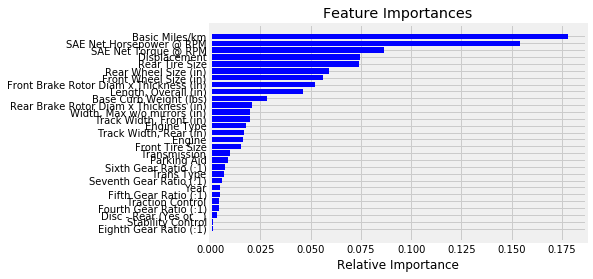

In [74]:
 # print feature importances
importances = model.feature_importances_
indices = np.argsort(importances)
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

# FEATURE SELECTION

In [75]:
from sklearn.feature_selection import SelectKBest, chi2

In [76]:
df.shape

(32262, 238)

In [124]:
df2 = df.copy(deep=True)
tab = df2.loc[:, df2.dtypes == object].columns.values.tolist()
for col in tab:
    df2[col] = df2[col].astype('category').cat.codes

In [125]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df2) 
df2.loc[:,:] = scaled_values
df2["MSRP"] = df["MSRP"]

In [126]:
y = df2.iloc[:, 0]
df2 = df2.drop("MSRP", axis=1)
X = df2


In [127]:
chi2(X, y)

(array([ 2496.12803974,  2746.86456114,  1883.06247985,  2149.53975927,
         1965.12258939,  1222.19761707,  2447.70777218,  4490.16239865,
         3638.22781892,  4881.33080898,  5362.51975429,  4946.42050314,
         1785.95177348,  3908.18400217,  6298.13664116,  2972.88713753,
         3680.06291142,  5203.75540624,  2274.00202909,  3178.13048071,
         3320.13832812,  5737.15885397,  4874.99357199,  3654.45352999,
         4887.39336702,  2713.8137234 ,  6880.39822376,  7874.08288074,
         8085.58506185,  3078.07344779,  3357.31314207,  2541.36842052,
         2840.05474285,  7004.44866122,  4158.62594153,  1906.68577603,
         2559.93698135,  4018.19342654,  3756.34297641,  2897.25455333,
         6786.47702261,  3557.77493565,  3203.31482797, 11498.48712422,
         7937.39247713,  3436.1706305 ,  2551.71104527,  5605.26311571,
         4083.38091883, 10457.5266113 ,  1780.81587288,  3614.82316147,
         4411.54248029,  1771.97499051,  4975.08616216,  4228.46

In [138]:
selector = SelectKBest(chi2, k=30)
selector.fit_transform(X, y)
tab = selector.get_support()

In [139]:
col_names = df2.columns.values.tolist()
size = len(col_names)
i = 0
tab_names = ["MSRP"]
while i < size:
    if tab[i]:
        print(col_names[i])
        tab_names.append(col_names[i])
    i +=1

Seventh Gear Ratio (:1)
Drum - Rear (Yes or   )
Air Bag-Passenger Switch (On/Off)
Air Bag-Side Body-Rear
Night Vision
Rollover Protection Bars
Parking Aid
Cargo Area Length @ Floor to Seat 3 (in)
Third Shoulder Room (in)
Third Hip Room (in)
Number of Passenger Doors
Warranty Note
Basic Note
Engine Oil Cooler
Transfer Case Power Take Off
Brake ABS System (Second Line)
Ninth Gear Ratio (:1)
Step Up Height - Front (in)
Length, Overall w/rear bumper (in)
Step Up Height - Side (in)
Side Door Opening Width (in)
Overhang, Rear w/bumper (in)
Cargo Area Length @ Floor to Seat 4 (in)
Aux Fuel Tank Location
Tenth Gear Ratio (:1)
Fourth Hip Room (in)
Fourth Leg Room (in)
Fourth Shoulder Room (in)
Fourth Head Room (in)
Corrosion Note


In [144]:
df4 = df[tab_names]
tab = df4.loc[:, df4.dtypes == object].columns.values.tolist()
for col in tab:
    df4[col] = df4[col].astype('category').cat.codes
print(df4.shape)

(32262, 31)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [145]:
df4 = drop_null_values_percent(df, 100)
tab = df4.loc[:, df4.dtypes == object].columns.values.tolist()
for col in tab:
    df4[col] = df4[col].astype('category').cat.codes
tab_names = np.append("MSRP", np.array(df4.corr()["MSRP"].sort_values(ascending=False)[1:30].index))
df4 = df[tab_names]
tab = df4.loc[:, df4.dtypes == object].columns.values.tolist()
for col in tab:
    df4[col] = df4[col].astype('category').cat.codes
print(df4.shape)
df4.head()
df4.info()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


(32262, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   MSRP                                     32262 non-null  int32
 1   Rear Wheel Size (in)                     32262 non-null  int16
 2   SAE Net Horsepower @ RPM                 32262 non-null  int16
 3   Front Wheel Size (in)                    32262 non-null  int16
 4   SAE Net Torque @ RPM                     32262 non-null  int16
 5   Front Brake Rotor Diam x Thickness (in)  32262 non-null  int16
 6   Basic Miles/km                           32262 non-null  int8 
 7   Parking Aid                              32262 non-null  int8 
 8   Rear Tire Size                           32262 non-null  int16
 9   Rear Brake Rotor Diam x Thickness (in)   32262 non-null  int16
 10  Seventh Gear Ratio (:1)                  32262 non-null  i

In [146]:
# getting X, y
liste_variables = list(df4.iloc[:, 1::].columns)
X = df4.iloc[:, 1::]c
y = df4.iloc[:, 0]
X = np.array(X)
y = np.array(y)    
    
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
cv = KFold(n_splits=2, shuffle=True, random_state=42)
rf = RandomForestRegressor()
    
n_estimators = [int(x) for x in np.linspace(start=100, stop=200, num=10)]
print("n_estimators :", n_estimators)
max_features = [None, 'auto', 'sqrt']
max_depth = [14, 18]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=cv, verbose=3,
                        n_jobs=2, return_train_score=True, scoring="r2")

# FIT BEST PARAMS
print("\nAlgo", "-"*30, "\n")

clf.fit(X_train, y_train)

print("Best params :", clf.best_params_)
print("Best score :", clf.best_score_)

model = clf.best_estimator_

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print("R2 train :", r2_score(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
print("R2 test :", r2_score(y_test, y_pred_test))

# Kfold
print("\nKfold", "-"*30, "\n")

score = cross_val_score(model, X_train, y_train, cv=cv, scoring="r2")
    
print("\nKfold score mean :", score.mean() * 100.0)
print("Kfold std deviation :", score.std() * 100.0)
print("Kfold accuracy for each kfold :", score)
print("Kfold variance :", score.var())

n_estimators : [100, 111, 122, 133, 144, 155, 166, 177, 188, 200]

Algo ------------------------------ 

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best params : {'n_estimators': 188, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 14, 'bootstrap': True}
Best score : 0.9651007170480441
R2 train : 0.9887249817754138
R2 test : 0.97679726896713

Kfold ------------------------------ 


Kfold score mean : 96.52866569661246
Kfold std deviation : 0.022159619109796136
Kfold accuracy for each kfold : [0.96506506 0.96550825]
Kfold variance : 4.910487190912421e-08


Text(0.5, 0, 'Relative Importance')

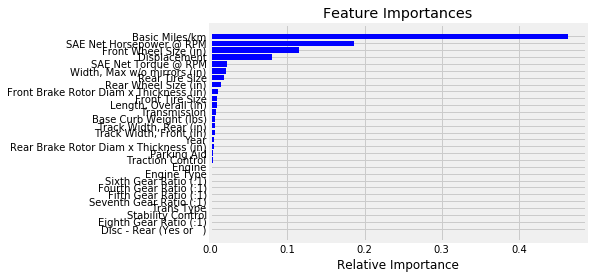

In [147]:
 # print feature importances
importances = model.feature_importances_
indices = np.argsort(importances)
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

# Select From Model

In [148]:
from sklearn.feature_selection import SelectFromModel

In [149]:
df2 = df.copy(deep=True)
tab = df2.loc[:, df2.dtypes == object].columns.values.tolist()
for col in tab:
    df2[col] = df2[col].astype('category').cat.codes
y = df2.iloc[:, 0]
df2 = df2.drop("MSRP", axis=1)
X = df2

In [161]:
df2.shape

(32262, 237)

In [152]:
selector = SelectFromModel(RandomForestRegressor(random_state=42), threshold="mean")
selector.fit(X, y)
tab = selector.get_support()

In [153]:
col_names = df2.columns.values.tolist()
size = len(col_names)
i = 0
tab_names = ["MSRP"]
while i < size:
    if tab[i]:
        print(col_names[i])
        tab_names.append(col_names[i])
    i +=1

Wheelbase (in)
Width, Max w/o mirrors (in)
Height, Overall (in)
Engine Order Code
SAE Net Torque @ RPM
SAE Net Horsepower @ RPM
Displacement
Front Brake Rotor Diam x Thickness (in)
Rear Tire Size
Front Wheel Size (in)
Rear Wheel Size (in)
Basic Miles/km
Basic Years
Modele


In [156]:
df4 = df[tab_names]
tab = df4.loc[:, df4.dtypes == object].columns.values.tolist()
for col in tab:
    df4[col] = df4[col].astype('category').cat.codes
print(df4.shape)

(32262, 15)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [157]:
# getting X, y
liste_variables = list(df4.iloc[:, 1::].columns)
X = df4.iloc[:, 1::]
y = df4.iloc[:, 0]
X = np.array(X)
y = np.array(y)    
    
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
cv = KFold(n_splits=2, shuffle=True, random_state=42)
rf = RandomForestRegressor()
    
n_estimators = [int(x) for x in np.linspace(start=100, stop=200, num=10)]
print("n_estimators :", n_estimators)
max_features = [None, 'auto', 'sqrt']
max_depth = [14, 18]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=cv, verbose=3,
                        n_jobs=2, return_train_score=True, scoring="r2")

# FIT BEST PARAMS
print("\nAlgo", "-"*30, "\n")

clf.fit(X_train, y_train)

print("Best params :", clf.best_params_)
print("Best score :", clf.best_score_)

model = clf.best_estimator_

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print("R2 train :", r2_score(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
print("R2 test :", r2_score(y_test, y_pred_test))

# Kfold
print("\nKfold", "-"*30, "\n")

score = cross_val_score(model, X_train, y_train, cv=cv, scoring="r2")
    
print("\nKfold score mean :", score.mean() * 100.0)
print("Kfold std deviation :", score.std() * 100.0)
print("Kfold accuracy for each kfold :", score)
print("Kfold variance :", score.var())

n_estimators : [100, 111, 122, 133, 144, 155, 166, 177, 188, 200]

Algo ------------------------------ 

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best params : {'n_estimators': 188, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 18, 'bootstrap': True}
Best score : 0.9700346131247517
R2 train : 0.9916987551685137
R2 test : 0.9811316418642301

Kfold ------------------------------ 


Kfold score mean : 97.0717412514712
Kfold std deviation : 0.09463820426015013
Kfold accuracy for each kfold : [0.96977103 0.97166379]
Kfold variance : 8.956389705585897e-07


Text(0.5, 0, 'Relative Importance')

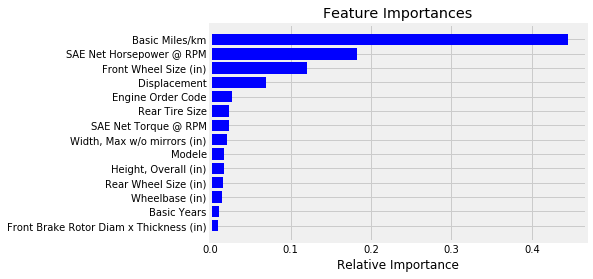

In [158]:
 # print feature importances
importances = model.feature_importances_
indices = np.argsort(importances)
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

In [160]:
y

array([40600, 45500, 43600, ..., 44850, 41000, 44650])